**Problem Statement**

The manager of a retail store is trying to find out an association rule between six items, to figure out which items are more often bought together so that he can keep the items together in order to increase sales

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=b0f539d4edcb033b4b3f14d115dcf2c69bea59846ee80a4000e28e7bc9f76ec5
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Import Dataset**

In [3]:
data=pd.read_csv("bread basket.csv")  

In [4]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


**Data Preprocessing**

In [5]:
data.shape

(20507, 5)

In [6]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

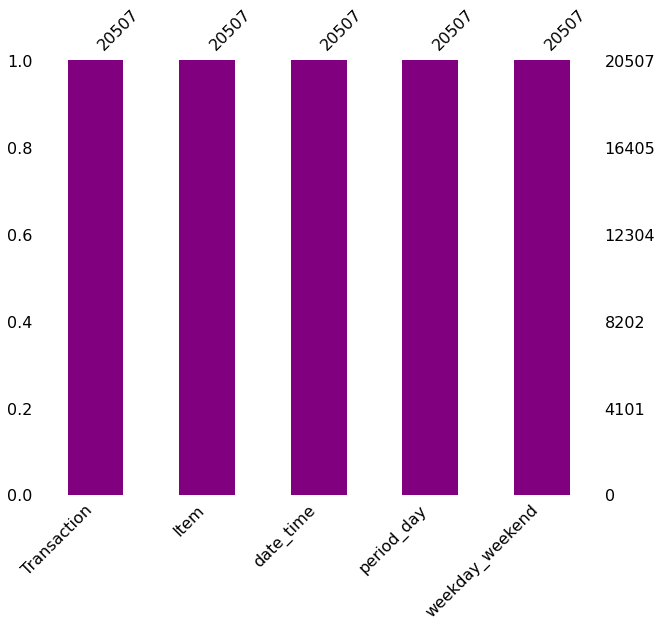

In [9]:
msno.bar(data, color = 'purple', figsize = (10,8))  #### Check the missing values in test data

In [10]:
data['date_time']=pd.to_datetime(data['date_time'])

In [11]:
data['date']=data['date_time'].dt.date


In [12]:
data['time']=data['date_time'].dt.time

In [13]:
data['month']=data['date_time'].dt.month

data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [14]:
data['day']=data['date_time'].dt.weekday

data['day'] = data['day'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [15]:
data['hour']=data['date_time'].dt.hour


In [16]:
data.drop('date_time', axis = 1, inplace = True)


In [17]:
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10


**Data Visualization**

Transaction per hour of the day

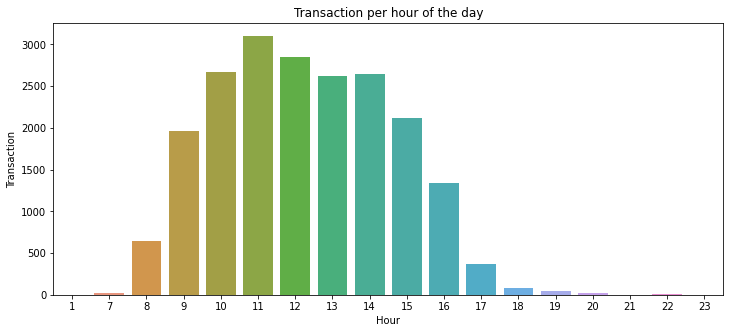

In [18]:
coutbyhour=data.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

Transaction by Day period

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


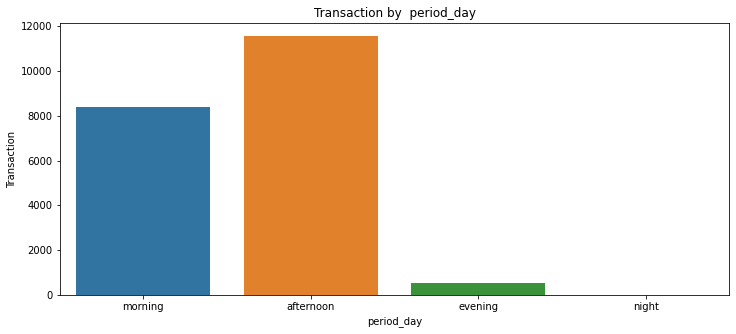

In [19]:
coutbyweekday=data.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.sort_values('period_day',inplace=True)

plt.figure(figsize=(12,5))
sns.countplot(data['period_day'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

Conclusion: Most of the People prefer to order in morning and afternoon.

Transaction per day of the week 

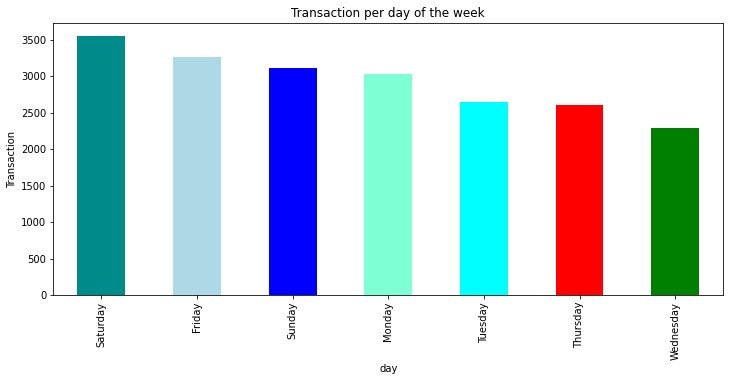

In [20]:
coutbydayp=data.groupby('day')['Transaction'].count().reset_index()
coutbydayp.sort_values('day',inplace=True)

plt.figure(figsize=(12,5))
data['day'].value_counts(dropna = False).plot.bar(color=['darkcyan','lightblue','blue','aquamarine', 'cyan','red', 'green'])
plt.xlabel('day')
plt.ylabel('Transaction')
plt.title('Transaction per day of the week')
plt.show()




People perfer to order on saturday,friday.


Transaction by week period

In [21]:
data['weekday_weekend'].value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

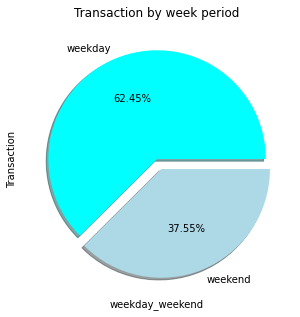

In [22]:
size = [12807, 7700]
labels = "weekday", "weekend"
colors = ["cyan", "lightblue"]
explode = [0, 0.1]


plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.xlabel('weekday_weekend')
plt.ylabel('Transaction')
plt.title('Transaction by week period')
plt.show()

People prefer to order in weekdays

Transaction by Month

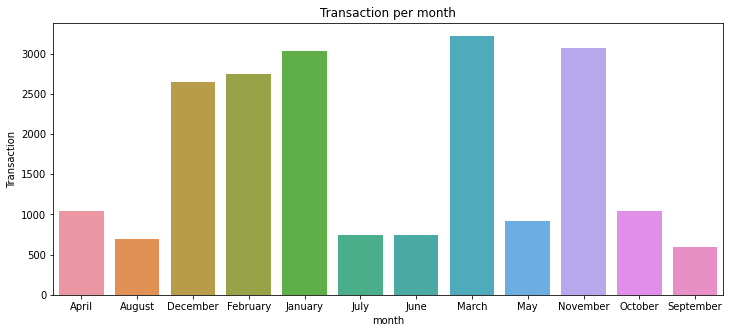

In [23]:
coutbymonth=data.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('month')
plt.ylabel('Transaction')
plt.title('Transaction per month')
plt.show()

Top sold product

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

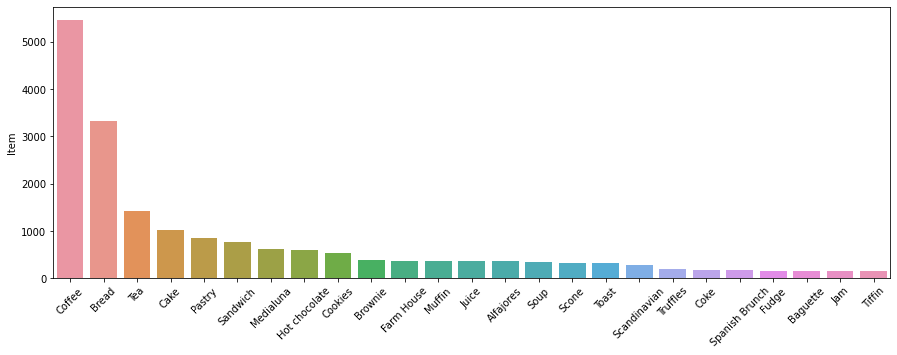

In [24]:
fig = plt.figure(figsize=(15,5))

names = data.Item.value_counts().head(25).index
values = data.Item.value_counts().head(25)
sns.barplot(x = names, y = values)
plt.xticks(rotation=45)

Top sold items were: Coffee, Bread, Tea

items with least sell:Tiffin,Jam

**Apriori Algorithm**

In [25]:
from mlxtend.frequent_patterns import association_rules, apriori


In [26]:
transactions = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [28]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
table = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [29]:
table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction
def hot_encode(x): 
    if(x==0): 
        return 0
    if(x>0): 
        return 1

In [34]:
# applying the function to the dataset
final_table=table.applymap(hot_encode)

In [35]:
final_table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

In [38]:
# now making the rules from frequent itemset generated above
rules.sort_values('confidence', ascending = False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
17,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
21,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
23,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
25,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
11,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
13,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


In [39]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
17,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
21,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
23,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
25,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
11,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
13,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


As per the above table we can analyse that coffee is an item that is very associated with other purched items in the bakery, such as toast,medialuana and pastry.

Hope you enjoy!!!

Thank you.